# Predict if the client will subscribe a term deposit 

#### Goal: 
Task is to create a model that will help this banking institution determine, in advance, clients who will be receptive to marketing campaigns.

#### Benefit of marketing campaign:
1. Direct marketing campaigns can be linked to increasing business revenue by informing potential customers about new bank products, and promoting them for sale. 

2. Targeted marketing campaigns can significantly increase subscription/purchase rates fpr new bank products and revenue as the targeted audience is based on the criteria determined from analysis of past marketing campaigns. 

Thus, data mining on past campaigns and profiling target customers/potential buyers can  reduce marketing costs & increase revenue.


#### Data: 
1. The case study is based on an example from UC Irvine’s Machine Learning Repository. 
(https://archive.ics.uci.edu/ml/datasets/Bank+Marketing ) 

2. Datasets contain direct marketing campaign outcomes of a Portuguese banking institution based on phone calls that were performed between May 2008 and November 2010. 


#### About Dataset:
1. The marketing campaign is to sell term deposits. For each phone call, client information  and the outcome of the phone call is noted. 
2. Client information contains age, education status and the client's current financial situation. 
3. Last phone call information from the previous marketing campaign is also noted. 

This provides information on type of client that has been contacted, along with information on the historical outcome from previous marketing campaigns.


##### For this case study, bank-additional-full.csv file is used. It contains more features than bank-full.csv.

## -----------------------------------------------------------------------------------

## --------------------Section 1: Familiarize with dataset--------------------

1. Import required Python libraries
2. Import dataset
3. Check missing values
4. Check types of columns
5. Check column datatypes



In [80]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [72]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import numpy as np
import pickle

from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from collections import Counter
import sklearn; print("Scikit-Learn", sklearn.__version__)

from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

Scikit-Learn 0.24.1



##### The list of features from the dataset along with their sample values:

In [28]:
bank_df=pd.read_csv("bank-additional-full.csv", sep=';')
#bank_df['y'] = bank_df['y'].map({'yes': 1, 'no': 0})
#bank_df['y']=bank_df['y'].astype('bool')
bank_df.head().T

,0,1,2,3,4
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may
day_of_week,mon,mon,mon,mon,mon


##### Check dataset dimension & evaluate any missing values

In [3]:
bank_df.shape

(41188, 21)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

 There are no missing values. If there were any, missing values can be filled in with median or mode values.

##### Datatypes check to confirm if default datatype matches expected datatypes

In [29]:
# data types
field=[]
types=[]
expectd=['numeric','categorical','categorical','categorical','categorical'
         ,'categorical','categorical','categorical','categorical','categorical'
         ,'numeric','numeric','numeric','numeric','categorical'
         ,'numeric','numeric','numeric','numeric','numeric'
         ,'binary']
value=['numbers','12 categories','4 categories','8 categories','No/Yes/Unknown'
      ,'No/Yes/Unknown','No/Yes/Unknown','Cellular/Telephone','12 categories','5 categories'
      ,'numbers','numbers','numbers','numbers','3 categories'
      ,'numbers','numbers','numbers','numbers','numbers','1/0']
for i in bank_df.columns:
    field.append(i)
    types.append(type(bank_df[i][0]))

data_type=pd.DataFrame(list(zip(field,types,expectd, value)))
data_type.rename(columns={0:'Field',1:'Default Data Type',2:'Expected Data Type',3:'Expected Field Values'},inplace=True)
data_type

,Field,Default Data Type,Expected Data Type,Expected Field Values
0,age,<class 'numpy.int64'>,numeric,numbers
1,job,<class 'str'>,categorical,12 categories
2,marital,<class 'str'>,categorical,4 categories
3,education,<class 'str'>,categorical,8 categories
4,default,<class 'str'>,categorical,No/Yes/Unknown
5,housing,<class 'str'>,categorical,No/Yes/Unknown
6,loan,<class 'str'>,categorical,No/Yes/Unknown
7,contact,<class 'str'>,categorical,Cellular/Telephone
8,month,<class 'str'>,categorical,12 categories
9,day_of_week,<class 'str'>,categorical,5 categories


## --------------------Section 1 Takeaway: About Dataset ------------------

1. Data has 21 attributes & 41188 instances 
2. No columns have missing values
3. Default datatypes set upon csv import match the expected datatypes & values per available dataset information.
4. There are two types of attributes Numerical & Categorical

## -----------------------------------------------------------------------------------

## --------------------Section 2: Study Numerical Attributes-------------------

1. Find central tendency & spread of numeric variables
2. Study distribution plots
3. Identify any outliers

In [6]:
# print statistics for numerical columns
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


##### Check distributions of numeric fields

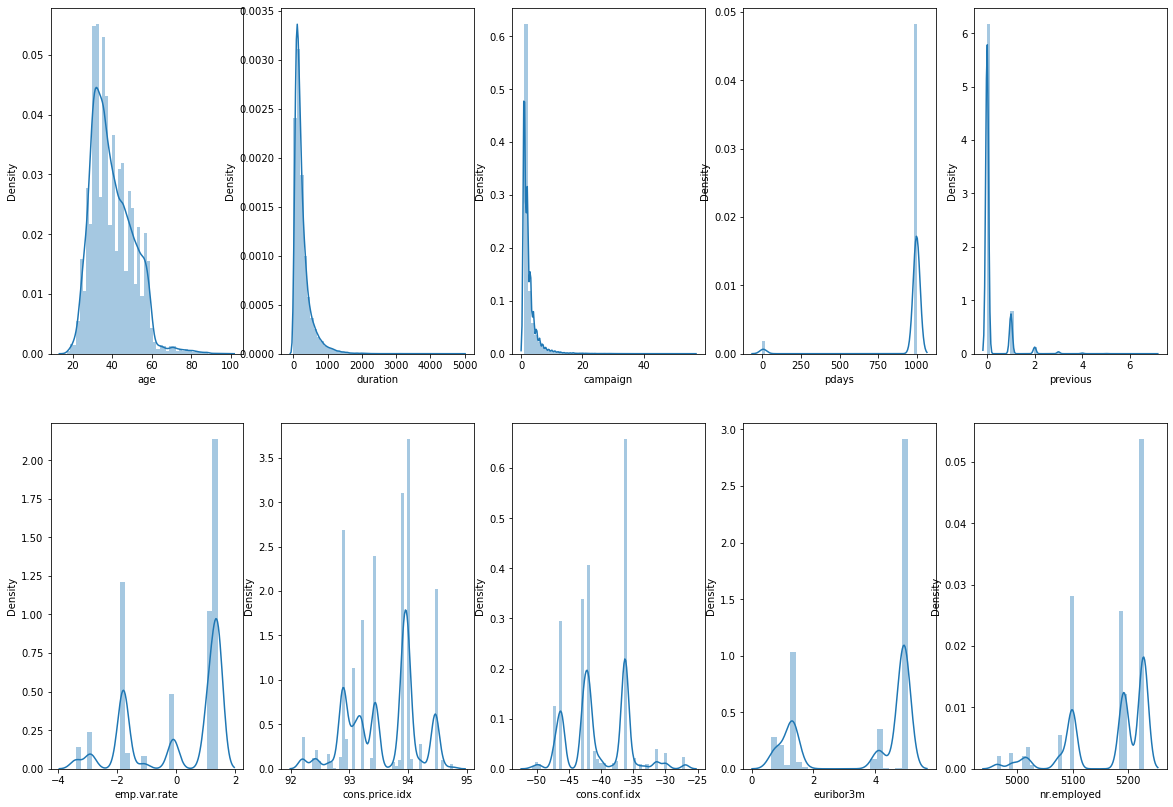

In [7]:
numericFields=[i for i in bank_df.columns if np.issubdtype(bank_df[i].dtype, np.number)]

plt.figure(figsize=(20,14))
for x, column in enumerate(numericFields):
    plt.subplot(2,5, x+1)
    sns.distplot(bank_df[column])
plt.savefig("Numeric_Fields_Distributions.png", format="png",dpi=400)

In [8]:
Freq_Value=bank_df['campaign'].mode()[0]
Min_Value=bank_df['campaign'].min()
Max_Value=bank_df['campaign'].max()
print("----------------------------")
print("Campaign field:")
print("Mode: ",Freq_Value)
print("Minimum Value:",Min_Value)
print("Maximum Value:",Max_Value)
print("----------------------------")

Freq_Value=bank_df['pdays'].mode()[0]
Min_Value=bank_df['pdays'].min()
Max_Value=bank_df['pdays'].max()
print("----------------------------")
print("pdays field:")
print("Mode: ",Freq_Value)
print("Minimum Value:",Min_Value)
print("Maximum Value:",Max_Value)
print("----------------------------")

Freq_Value=bank_df['previous'].mode()[0]
Min_Value=bank_df['previous'].min()
Max_Value=bank_df['previous'].max()
print("----------------------------")
print("previous field:")
print("Mode: ",Freq_Value)
print("Minimum Value:",Min_Value)
print("Maximum Value:",Max_Value)
print("----------------------------")


Uniq_months=bank_df['month'].unique()
print(Uniq_months)

----------------------------
Campaign field:
Mode:  1
Minimum Value: 1
Maximum Value: 56
----------------------------
----------------------------
pdays field:
Mode:  999
Minimum Value: 0
Maximum Value: 999
----------------------------
----------------------------
previous field:
Mode:  0
Minimum Value: 0
Maximum Value: 7
----------------------------
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


## ------------------Section 2 Takeaway: Numerical Attributes ----------------

1. All Numeric fields except 'age', 'campaign' and 'duration' have scattered/fewer values.
2. 'pdays'have most values as '999'

## -----------------------------------------------------------------------------------

## -------------------Section 3: Study Categorical Attributes-------------------


1. Study frequency plots
2. Identify any outliers

### Check Frequencies of Categorical fields

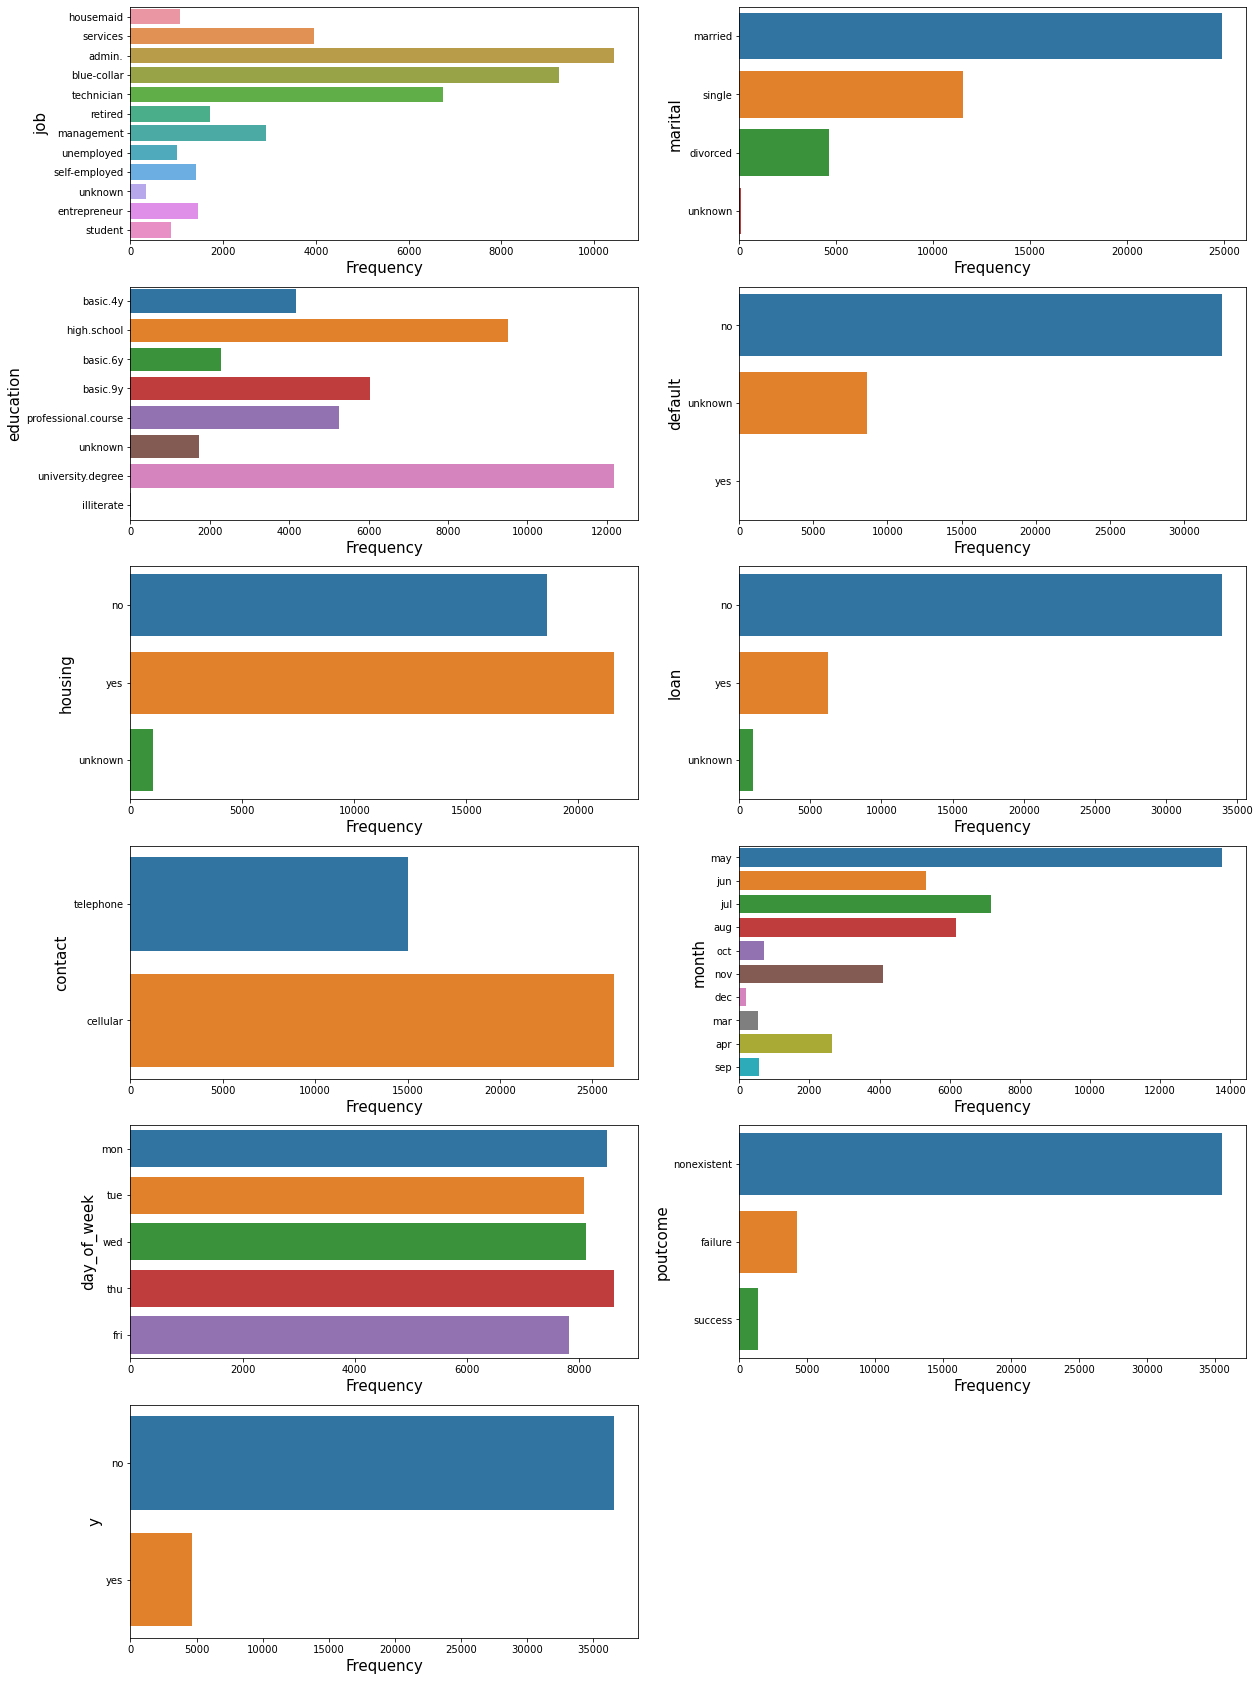

In [9]:
categoricalFields=[i for i in bank_df.columns if pd.api.types.is_string_dtype(bank_df[i])]

plt.figure(figsize=(20,30))
for x, column in enumerate(categoricalFields):
    plt.subplot(6,2, x+1)
    ax=sns.countplot(y=column, data =bank_df)
    ax.set_xlabel("Frequency", fontsize=15)
    ax.set_ylabel(column, fontsize=15)
plt.savefig("Categorical_Fields_Distributions.png", format="png",dpi=400)

## ----------Section 3 Takeaway: Study Categorical Attributes----------------


1. Study frequency plots
2. Identify any outliers

## -----------------------------------------------------------------------------------

## -------------------Section 4: Study Outcome Attribute-------------------


1. Checking proportion of "y: customer subscribed or not" variable
2. Hypothesis test to answer 'Is there a different pattern across numerical variables for contacted customers who subscribed for term deposit and those who did not?'

### Checking proportion of "y: customer subscribed or not" variable

In [10]:
print("--------------------------------------------------------")
print("y (customer subscribed or not) field: Frequency")
print(bank_df['y'].value_counts())
print("--------------------------------------------------------")
print("y (customer subscribed or not) field: Percentage")
print((bank_df['y'].value_counts(normalize=True)*100))

--------------------------------------------------------
y (customer subscribed or not) field: Frequency
no     36548
yes     4640
Name: y, dtype: int64
--------------------------------------------------------
y (customer subscribed or not) field: Percentage
no     88.734583
yes    11.265417
Name: y, dtype: float64


There are 11.3% 'yes' and 88.7% 'no' values in 'y' field. 
#### This indicates that only 11% of contacted customers accepted bank offer of term deposit.

### Is there a different pattern across numerical variables for contacted customers who subscribed for term deposit and those who did not?


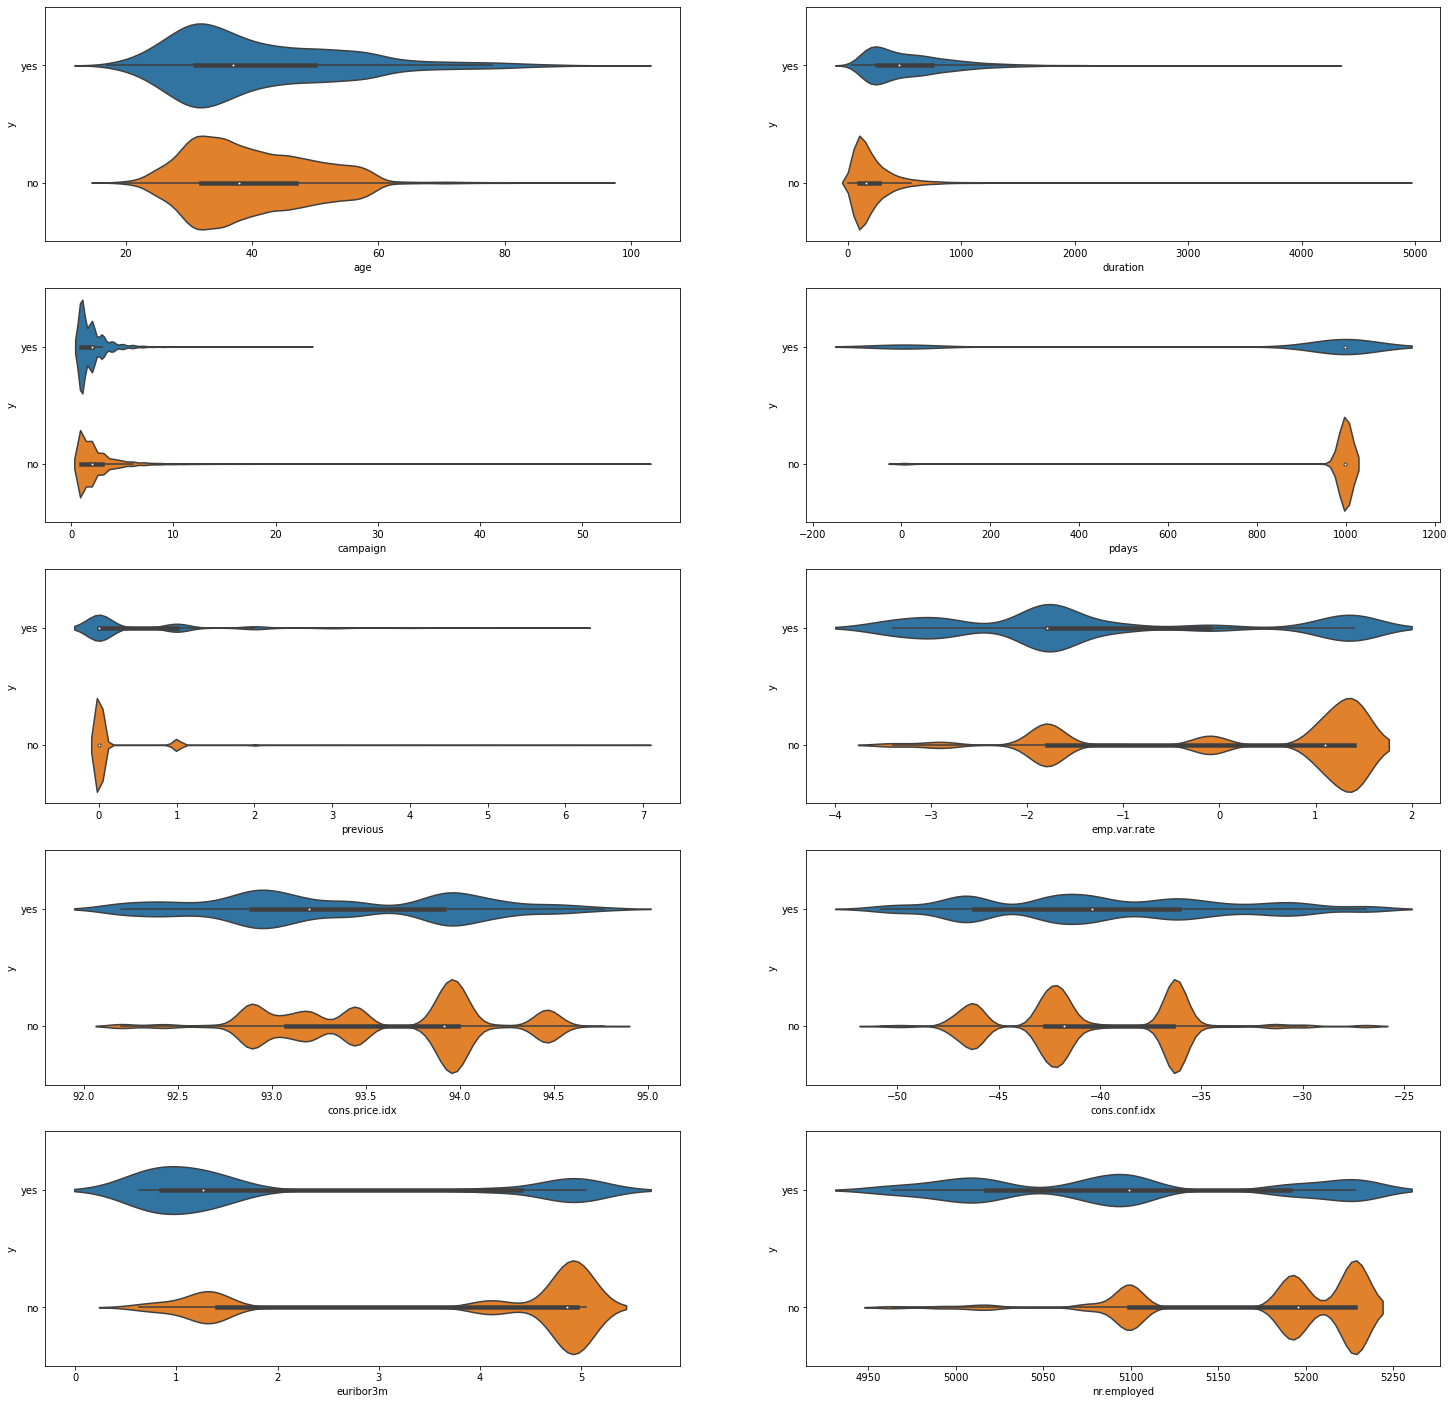

In [11]:
plt.figure(figsize=(25,25))
for index, column in enumerate(numericFields):
    plt.subplot(5, 2, index+1)
    sns.violinplot(x=column, y="y", data=bank_df, order=["yes", "no"])
plt.savefig("violin_plots_numerical_fields.png", format="png", dpi=500)

In [12]:
# Compute mean of columns for subscribers and non-subscribers and then evaluate 
# t test statistic with pvalue with 
# Null hypothesis as there is no difference in means for subscribers and non-subscribers


def Hypothesis_test(df, col):
    
    subscriber_rows = df["y"] == "yes"
    yes_values = df[col][subscriber_rows]
    no_values = df[col][~subscriber_rows]
    mean_subscribers = yes_values.mean()
    mean_nonsubscribers = no_values.mean()
    ttest_res = ttest_ind(yes_values, no_values)
    kstest_res=ks_2samp(yes_values, no_values)
    
    return [col, mean_subscribers, mean_nonsubscribers,
            round(ttest_res[0], 4), round(ttest_res[1],0),
            round(kstest_res[0], 4), round(kstest_res[1],0)
           ]

Hypothesis_test_df = pd.DataFrame(columns=["Numeric Field", "mean_subscribers", "mean_nonsubscribers", "t_test statistic", "t_test pvalue"
                                      , "ks_test statistic", "ks_test pvalue"
                                     ])
for index, column in enumerate(numericFields):
    Hypothesis_test_df.loc[index] = Hypothesis_test(bank_df, column)
    
Hypothesis_test_df



,Numeric Field,mean_subscribers,mean_nonsubscribers,t_test statistic,t_test pvalue,ks_test statistic,ks_test pvalue
0,age,40.913147,39.911185,6.1721,0.0,0.0861,0.0
1,duration,553.191164,220.844807,89.9672,0.0,0.4641,0.0
2,campaign,2.051724,2.633085,-13.4965,0.0,0.0808,0.0
3,pdays,792.035560,984.113878,-69.7221,0.0,0.1934,0.0
4,previous,0.492672,0.132374,48.0027,0.0,0.2102,0.0
5,emp.var.rate,-1.233448,0.248875,-63.4337,0.0,0.4324,0.0
6,cons.price.idx,93.354386,93.603757,-27.9032,0.0,0.2281,0.0
7,cons.conf.idx,-39.789784,-40.593097,11.1539,0.0,0.1998,0.0
8,euribor3m,2.123135,3.811491,-65.6466,0.0,0.4326,0.0
9,nr.employed,5095.115991,5176.166600,-76.9845,0.0,0.4324,0.0


### Conclusion from Hypothesis test:

1. The p value for t test is < 0.05 indicating that there is not enough evidence to support null hypothesis that there is no difference between mean values for subscribers and non-subscribers.

2. The p value for kolmogorov-smirnov test is < 0.05 indicating that there is not enough evidence to support null hypothesis that there is no difference between distributions for subscribers and non-subscribers.


#### This leads us to conclude that there is a significant difference in mean values & distributions of numerical variables for subscribers & non-subscribers.



<Figure size 864x1440 with 0 Axes>

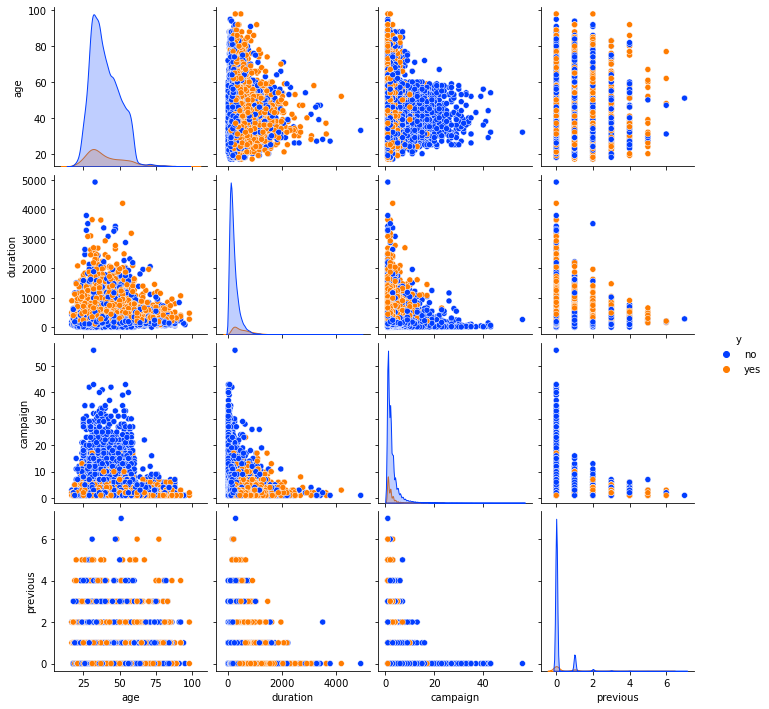

In [13]:
marketing_fields = ["age", "duration", "campaign", "previous"]
indicator_fields = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m"]
# create pairplot between numeric columns
marketing_plot_data = bank_df[marketing_fields + ["y"]]
plt.figure(figsize=(12,20))
#sns.color_palette("Paired")
sns.pairplot(marketing_plot_data, hue="y", palette="bright")
plt.savefig("pairplot_marketing_fields.png", format="png", dpi=250)


<Figure size 864x1440 with 0 Axes>

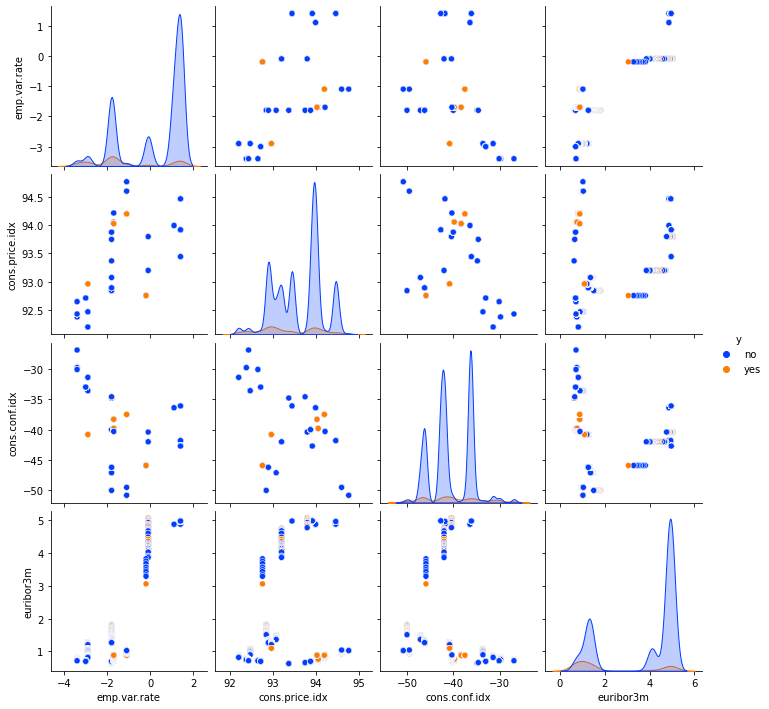

In [14]:
indicator_plot_data = bank_df[indicator_fields + ["y"]]
plt.figure(figsize=(12,20))
#sns.color_palette("Paired")
sns.pairplot(indicator_plot_data, hue="y", palette="bright")
plt.savefig("pairplot_indicator_fields.png", format="png", dpi=250)

In [15]:
# create mask for successful calls
successful_calls = bank_df.y == "yes"
# plot correlation matrix for successful calls
plot_data = bank_df[marketing_fields + indicator_fields][successful_calls]
successful_corr = plot_data.corr()
successful_corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.0000,-0.0593,-0.0079,0.0749,-0.0816,-0.0247,0.1412,-0.0854
duration,-0.0593,1.0000,0.1569,-0.2315,0.5031,0.2376,-0.1438,0.4997
campaign,-0.0079,0.1569,1.0000,-0.1041,0.2218,0.1165,-0.0429,0.2119
previous,0.0749,-0.2315,-0.1041,1.0000,-0.2848,0.0912,0.1278,-0.3920
emp.var.rate,-0.0816,0.5031,0.2218,-0.2848,1.0000,0.6603,-0.2672,0.9261
cons.price.idx,-0.0247,0.2376,0.1165,0.0912,0.6603,1.0000,-0.3283,0.4146
cons.conf.idx,0.1412,-0.1438,-0.0429,0.1278,-0.2672,-0.3283,1.0000,-0.1202
euribor3m,-0.0854,0.4997,0.2119,-0.3920,0.9261,0.4146,-0.1202,1.0000


In [16]:

# plot correlation matrix for unsuccessful calls
plot_data = bank_df[marketing_fields + indicator_fields][~successful_calls]
unsuccessful_corr = plot_data.corr()
unsuccessful_corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.0000,0.0008,0.0084,-0.0030,0.0268,0.0114,0.1247,0.0414
duration,0.0008,1.0000,-0.0833,-0.0043,0.0035,0.0177,0.0042,0.0065
campaign,0.0084,-0.0833,1.0000,-0.0678,0.1328,0.1233,-0.0071,0.1154
previous,-0.0030,-0.0043,-0.0678,1.0000,-0.4248,-0.2719,-0.1390,-0.4424
emp.var.rate,0.0268,0.0035,0.1328,-0.4248,1.0000,0.7972,0.3192,0.9760
cons.price.idx,0.0114,0.0177,0.1233,-0.2719,0.7972,1.0000,0.1523,0.7308
cons.conf.idx,0.1247,0.0042,-0.0071,-0.1390,0.3192,0.1523,1.0000,0.3931
euribor3m,0.0414,0.0065,0.1154,-0.4424,0.9760,0.7308,0.3931,1.0000


In [17]:

# plot correlation matrix for successful calls
plot_data = bank_df[marketing_fields + indicator_fields]
corr = plot_data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
age,1.0000,-0.0009,0.0046,0.0244,-0.0004,0.0009,0.1294,0.0108
duration,-0.0009,1.0000,-0.0717,0.0206,-0.0280,0.0053,-0.0082,-0.0329
campaign,0.0046,-0.0717,1.0000,-0.0791,0.1508,0.1278,-0.0137,0.1351
previous,0.0244,0.0206,-0.0791,1.0000,-0.4205,-0.2031,-0.0509,-0.4545
emp.var.rate,-0.0004,-0.0280,0.1508,-0.4205,1.0000,0.7753,0.1960,0.9722
cons.price.idx,0.0009,0.0053,0.1278,-0.2031,0.7753,1.0000,0.0590,0.6882
cons.conf.idx,0.1294,-0.0082,-0.0137,-0.0509,0.1960,0.0590,1.0000,0.2777
euribor3m,0.0108,-0.0329,0.1351,-0.4545,0.9722,0.6882,0.2777,1.0000


## Feature Engineering 

In this approach:
1. Keep the "unknown" values as is in the categorical data along with "999" value for pdays field
2. Discard "duration" field as we would not know call duration for future calls.



In [30]:
# CREATE LIST OF FEATURES
numeric_fields = ["age", "campaign", "previous","emp.var.rate",
                  "cons.price.idx", "cons.conf.idx", "euribor3m"]
categoricalFields=['job', 'marital', 'education', 'default', 
                   'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
print(categoricalFields)
print(numeric_fields)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


### ONE-HOT ENCODING FOR CATEGORICAL VARIABLES

1. One-hot encoding is used to create new columns for each unique value in that column
2. DUMMY ENCODING is to ensure the number of dummy-coded variables needed is one less than the number of possible values
3. Dummy encoding variable is a standard advice in statistics to avoid the dummy variable trap, However, in the world of machine learning, One-Hot encoding is more recommended because dummy variable trap is not really a problem when applying regularization.
4. 'drop_first = True' option is used to address correlation issue between these newly created columns (value in one column can be figured out from rest of the columns)


In [31]:
bank_df[categoricalFields]
one_hot_encoded= pd.get_dummies(bank_df[categoricalFields], drop_first=True)
bank_df = pd.concat([bank_df,one_hot_encoded],axis=1 )
#one_hot_encoded_columns=list(one_hot_encoded.columns)
#print(one_hot_encoded_columns)


data_vars=bank_df.columns.values.tolist()

to_keep=[i for i in data_vars if i not in categoricalFields]

df=bank_df[to_keep]
df.columns.values



array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',

In [32]:

df['y'] = bank_df['y'].map({'yes': 1, 'no': 0})
df['y'].unique()

array([0, 1])

In [33]:
df=df.drop(['duration'], axis=1)
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


In [34]:

correlated_features = set()
correlation_matrix = df.drop('y', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
correlated_features
#correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(4)

{'euribor3m',
 'loan_unknown',
 'nr.employed',
 'poutcome_nonexistent',
 'poutcome_success'}

In [37]:
df=df.drop(['euribor3m'], axis=1)
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,job_blue-collar,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,5191.0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [38]:
# Over sampling

## Get the Subscribers and Non_subscribers dataset 

Subscribers = df[df['y']==1]

Non_subscribers = df[df['y']==0]

print(Subscribers.shape,Non_subscribers.shape)

(4640, 52) (36548, 52)


Over-sampling using SMOTE
With our training data created, I’ll up-sample the no-subscription using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:

Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [39]:

X = df.loc[:, df.columns != 'y']
y = df.loc[:, df.columns == 'y']

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))



length of oversampled data is  51158
Number of no subscription in oversampled data 25579
Number of subscription 25579
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [58]:
scaler=StandardScaler()
scaler.fit(os_data_X)


StandardScaler()

In [59]:

scalerfile='scaler.sav'
pickle.dump(scaler,open(scalerfile,'wb'))

In [60]:
scaler =pickle.load(open(scalerfile,'rb'))

In [74]:
os_data_X_tf=pd.DataFrame(scaler.transform(os_data_X))

Recursive Feature Elimination
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [75]:
X = os_data_X_tf
target = os_data_y

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=4,verbose=1, scoring='accuracy', n_jobs=-1)
rfecv.fit(X, target)


Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.


RFECV(cv=4, estimator=RandomForestClassifier(random_state=101), n_jobs=-1,
      scoring='accuracy', verbose=1)

In [76]:

print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 43


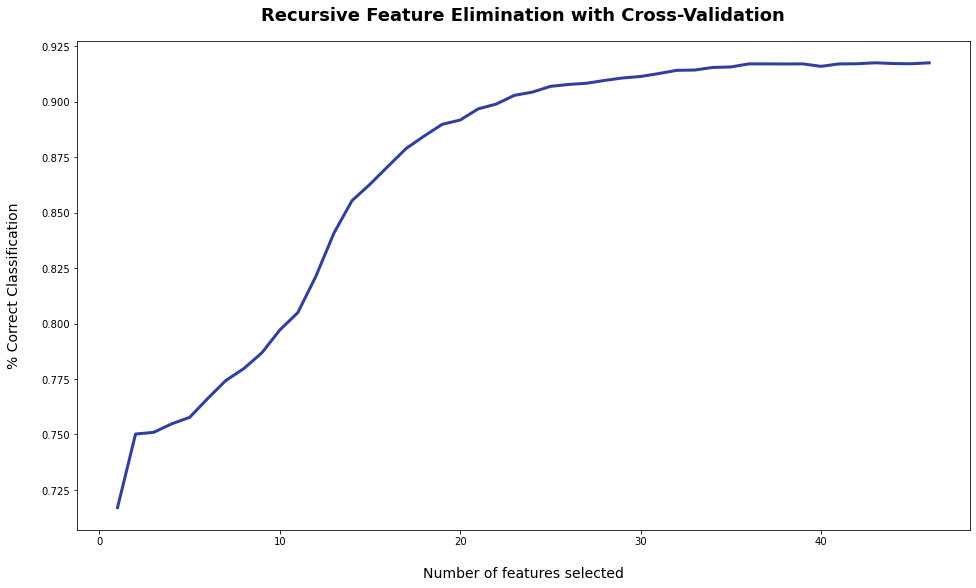

In [77]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [78]:
print(np.where(rfecv.support_ == False)[0])

X.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)



[18 30 36]


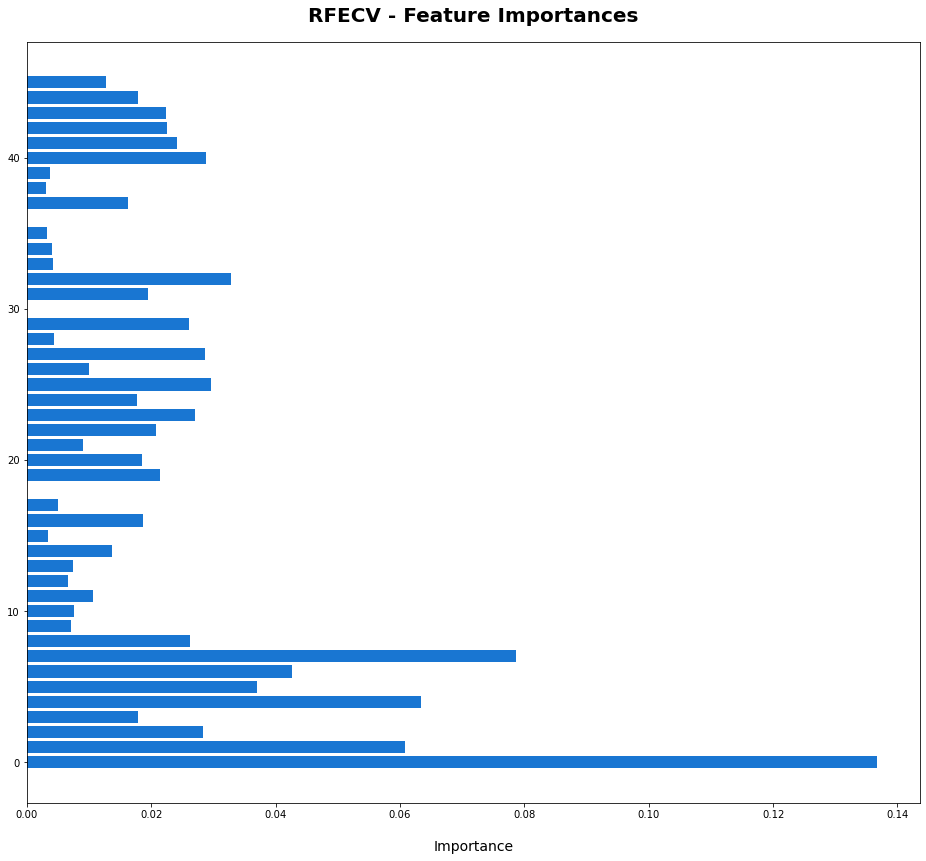

In [79]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(os_data_X, os_data_y)

LogisticRegression()

In [47]:
X_test.drop(X.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.71


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7836 3133]
 [ 418  970]]


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.82     10969
           1       0.24      0.70      0.35      1388

    accuracy                           0.71     12357
   macro avg       0.59      0.71      0.58     12357
weighted avg       0.87      0.71      0.76     12357



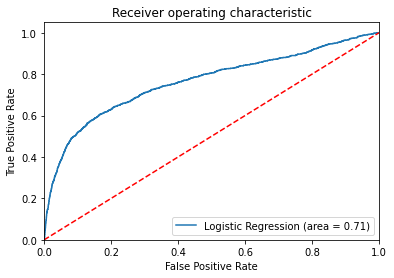

In [50]:
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve


logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))


fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])


plt.figure()


plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)


plt.plot([0, 1], [0, 1],'r--')


plt.xlim([0.0, 1.0])


plt.ylim([0.0, 1.05])


plt.xlabel('False Positive Rate')


plt.ylabel('True Positive Rate')


plt.title('Receiver operating characteristic')


plt.legend(loc="lower right")


plt.savefig('Log_ROC')


plt.show()

### Create Train-Test-Validation Splits
1. Training samples(70%): these samples are used to train the model
2. Validation samples(15%): these samples are held out from the training data and are used to make decisions on how to improve the model
3. Test samples(15%): these samples are held out from all decisions and are used to test (measure) the generalized performance of the model

In [ ]:
# shuffle the rows
df=df.sample(n=len(df),random_state=0)
df=df.reset_index(drop=True)


# train, validation & test data set creation 
df_val_test = df.sample(frac=0.3, random_state=0)
df_validation=df_val_test.sample(frac=0.5, random_state=0)
df_test=df_val_test.drop(df_validation.index)
df_train = df.drop(df_val_test.index)

print('Total rows of data :',(len(df)))
print('------------------------------------------------')
print('Total rows of data in Training set:',(len(df_train)))
print('Percentage of data in Training set: %.2f'%(len(df_train)/len(df)))
print('------------------------------------------------')
print('Total rows of data in Test set:',(len(df_test)))
print('Percentage of data in Test set: %.2f'%(len(df_test)/len(df)))
print('------------------------------------------------')
print('Total rows of data in Validation set:',(len(df_validation)))
print('Percentage of data in Validation set: %.2f'%(len(df_validation)/len(df)))

## Addressing Imbalanced Data concerns

Idea is to balance the data in a way to give more weightage to the positives. 
There are 3 techniques that are typically utilized:
1. sub-sample the more dominant class: using random subset of the negatives
2. over-sample the imbalanced class: using the same positive samples multiple times
3. create synthetic positive data

Usually, you will want to use the latter two methods if you only have a handful of positive cases. Since we have a few thousand positive cases, let’s use the sub-sample approach. Here, we will create a balanced training, validatoin and test data set that has 50% positive and 50% negative. You can also try tweaking this ratio to see if you can get an improvement.

In [ ]:
# Approach 1: sub-sample the more dominant class: using random subset of the negatives


##############################################
####### Training data subsample ##############
##############################################

positive_outcome=df_train.outcome_y==1
df_train_Positive=df_train.loc[positive_outcome]
df_train_Negative=df_train.loc[~positive_outcome]

df_train_subsample = pd.concat([df_train_Positive,
                                df_train_Negative.sample(n=len(df_train_Positive)
                                                         , random_state=0)],axis=0)
#print(len(df_train_subsample))


df_train_subsample=df_train_subsample.sample(n=len(df_train_subsample)
                                             ,random_state=0).reset_index(drop=True)


print('------------------------------------------------')
print('Total rows of data in subsampled training set:',(len(df_train_subsample)))
print('Total positive outcome rows of data in subsampled training set:',len(df_train_subsample.loc[df_train_subsample.outcome_y==1]))
print('Total negative outcome rows of data in subsampled training set:',len(df_train_subsample.loc[df_train_subsample.outcome_y==0]))


##############################################
####### Test data subsample ##################
##############################################


pos_outcome=df_test.outcome_y==1
df_test_Positive=df_test.loc[pos_outcome]
df_test_Negative=df_test.loc[~pos_outcome]

df_test_subsample = pd.concat([df_test_Positive,
                                df_test_Negative.sample(n=len(df_test_Positive)
                                                         , random_state=0)],axis=0)
#print(len(df_train_subsample))


df_test_subsample=df_test_subsample.sample(n=len(df_test_subsample)
                                             ,random_state=0).reset_index(drop=True)


print('------------------------------------------------')
print('Total rows of data in subsampled test set:',(len(df_test_subsample)))
print('Total positive outcome rows of data in subsampled test set:',len(df_test_subsample.loc[df_test_subsample.outcome_y==1]))
print('Total negative outcome rows of data in subsampled test set:',len(df_test_subsample.loc[df_test_subsample.outcome_y==0]))



##############################################
####### Validation data subsample ############
##############################################



pos_out=df_test.outcome_y==1
df_validation_Positive=df_test.loc[pos_out]
df_validation_Negative=df_test.loc[~pos_out]

df_validation_subsample = pd.concat([df_validation_Positive,
                                df_validation_Negative.sample(n=len(df_validation_Positive)
                                                         , random_state=0)],axis=0)
#print(len(df_train_subsample))


df_validation_subsample=df_validation_subsample.sample(n=len(df_validation_subsample)
                                             ,random_state=0).reset_index(drop=True)


print('------------------------------------------------')
print('Total rows of data in subsampled validation set:',(len(df_validation_subsample)))
print('Total positive outcome rows of data in subsampled validation set:',len(df_validation_subsample.loc[df_validation_subsample.outcome_y==1]))
print('Total negative outcome rows of data in subsampled validation set:',len(df_validation_subsample.loc[df_validation_subsample.outcome_y==0]))






#### Standardization of training data
There can be troubles in machine learning models when the variables are of different size (0–100, vs 0–1000000). To combat this, we can scale the data. Here we will use scikit-learn’s Standard Scalerwhich removes the mean and scales to unit variance. Here I will create a scaler using all the training data, but you could also use the balanced one if you wanted.

In [ ]:
scaler= StandardScaler()
scaler

### Evaluate default, housing, loan Variables

In [ ]:
f, axs = plt.subplots(1,3,figsize=(14, 6))


sns.histplot(data=bank_df, x="default", hue="y",stat="count",shrink=.5, alpha=.5, legend=True, ax=axs[0])

sns.histplot(data=bank_df, x="housing", hue="y",stat="count",shrink=.5, alpha=.5, legend=True, ax=axs[1])

sns.histplot(data=bank_df, x="loan", hue="y",stat="count",shrink=.5, alpha=.5, legend=True, ax=axs[2])


f.tight_layout()

### Evaluate Job, marital, education Variables

In [ ]:
f, axs = plt.subplots(3,figsize=(12, 14))


sns.histplot(data=bank_df, x="marital", hue="y",stat="count",shrink=.5, alpha=.5, legend=True, ax=axs[0])

sns.histplot(data=bank_df, x="education", hue="y",stat="count",shrink=.5, alpha=.5, legend=True, ax=axs[1])

sns.histplot(data=bank_df, x="job", hue="y",stat="count",shrink=.5, alpha=.5, legend=True, ax=axs[2])


locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

f.tight_layout()

### "Unknown" values in Categorical Variables 

Categorical features contain unknown values which can be thought of as missing values. 
Discarding such rows would lead to loss of data and may impact our prediction results.

To impute unknown values:
1. 'Education' field can be studied to impute/deduce 'job' field 
2. ABCD
3. ABCD
4. ABCD
5. ABCD

In [ ]:
plt.subplots(figsize=(10, 10))
sns.heatmap(pd.crosstab( [bank_df.job],[bank_df.education],
            dropna=False),
            cmap="YlGnBu", annot=True,fmt="d", linewidths=.5, cbar=False)


In [ ]:
lst = [bank_df]

for col in lst:
    col.loc[(col["job"] == "unknown") & (col["education"] == "basic.4y")
            , "job"] = "blue-collar"
    col.loc[(col["job"] == "unknown") & (col["education"] == "basic.6y")
            , "job"] = "blue-collar"
    col.loc[(col["job"] == "unknown") & (col["education"] == "basic.9y")
            , "job"] = "blue-collar"
    col.loc[(col["job"] == "unknown") & (col["education"] == "high.school")
            , "job"] = "admin."
    col.loc[(col["job"] == "unknown") & (col["education"] == "professional.course")
            , "job"] = "technician"
    col.loc[(col["job"] == "unknown") & (col["education"] == "university.degree")
            , "job"] = "admin."
    
    col.loc[(col["education"] == "unknown") & (col["job"] == "admin.")
            , "education"] = "university.degree"
    col.loc[(col["education"] == "unknown") & (col["job"] == "blue-collar")
            , "education"] = "basic.9y"
    col.loc[(col["education"] == "unknown") & (col["job"] == "entrepreneur")
            , "education"] = "university.degree"
    col.loc[(col["education"] == "unknown") & (col["job"] == "housemaid")
            , "education"] = "basic.4y"
    col.loc[(col["education"] == "unknown") & (col["job"] == "management")
            , "education"] = "university.degree"
    col.loc[(col["education"] == "unknown") & (col["job"] == "retired")
            , "education"] = "basic.4y" 
    col.loc[(col["education"] == "unknown") & (col["job"] == "self-employed")
            , "education"] = "university.degree"
    col.loc[(col["education"] == "unknown") & (col["job"] == "services")
            , "education"] = "high.school"
    col.loc[(col["education"] == "unknown") & (col["job"] == "student")
            , "education"] = "high.school"
    col.loc[(col["education"] == "unknown") & (col["job"] == "technician")
            , "education"] = "professional.course" 
    col.loc[(col["education"] == "unknown") & (col["job"] == "unemployed")
            , "education"] = "university.degree" 
    
bank_df = bank_df.drop(bank_df.loc[(bank_df["job"] == "unknown") & (bank_df["education"] == "unknown")].index)

plt.subplots(figsize=(12, 8))
sns.heatmap(pd.crosstab( [bank_df.job],[bank_df.education],
            dropna=False),
            cmap="YlGnBu", annot=True,fmt="d", linewidths=.5, cbar=False)



In [ ]:
# = plt.subplots(3,figsize=(12, 14))
f, axs=plt.subplots(3,figsize=(12, 12))
sns.heatmap(pd.crosstab( [bank_df.job],[bank_df.housing],
            dropna=False),
            cmap="YlGnBu", annot=True,fmt="d", linewidths=.5, cbar=False, ax=axs[0])
sns.heatmap(pd.crosstab( [bank_df.job],[bank_df.loan],
            dropna=False),
            cmap="YlGnBu", annot=True,fmt="d", linewidths=.5, cbar=False, ax=axs[1])
sns.heatmap(pd.crosstab( [bank_df.housing],[bank_df.loan],
            dropna=False),
            cmap="YlGnBu", annot=True,fmt="d", linewidths=.5, cbar=False, ax=axs[2])

f.tight_layout()